# Explore Training Curves

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set()
sns.set_style("whitegrid")
%matplotlib inline
plt.rcParams["figure.figsize"] = (6,5)

In [3]:
def find_moving_avg(data, window_size):
    if data.shape[0] == 1:
        quantile1 = np.zeros(data.shape[1]-window_size)
        quantile2 = np.zeros(data.shape[1]-window_size)
        avg = np.zeros(data.shape[1]-window_size)
        for i in range(data.shape[1]-window_size):
            avg[i] = np.mean(data[0,i:i+window_size])
            quantile1[i] = np.quantile(data[0,i:i+window_size], 0.25)
            quantile2[i] = np.quantile(data[0,i:i+window_size], 0.75)
        return avg, quantile1, quantile2
    else:
        std = np.std(data,axis=0)
        avg = np.mean(data,axis=0)
        smoothed_avg = np.zeros(data.shape[1]-window_size)
        smoothed_std = np.zeros(data.shape[1]-window_size)
        # smooth 
        for i in range(data.shape[1]-window_size):
            smoothed_avg[i] = np.mean(avg[i:i+window_size])
            smoothed_std[i] = np.mean(std[i:i+window_size])
        return smoothed_avg, smoothed_avg-smoothed_std, smoothed_avg+smoothed_std
            

def df_plot(dfs, x, y, isTaxi, isChain, isCliff, ylim=None, xlim=None, name = 'Wass', legend_loc='best'):
    """ Plot y vs. x curves from pandas dataframe(s)

    Args:
        dfs: list of pandas dataframes
        x: str column label for x variable
        y: str column label for y variable
        ylim: tuple to override automatic y-axis limits
        xlim: tuple to override automatic x-axis limits
        legend_loc: str to override automatic legend placement:
            'upper left', 'lower left', 'lower right' , 'right' ,
            'center left', 'center right', 'lower center',
            'upper center', and 'center'
    """
    if ylim is not None:
        plt.ylim(ylim)
    if xlim is not None:
        plt.xlim(xlim)
        
    n = len(dfs)
    ws = 5
    if isTaxi == True:
        min_len = 84
        timesteps_per_eps = 100
        timesteps_per_eps_wass = 70
        y_val = np.zeros((n,min_len))
        plt.title('Taxi', fontsize = 26)
    if isChain == True:
        min_len = 500
        timesteps_per_eps = 200
        timesteps_per_eps_wass = 200
        y_val = np.zeros((n,500))
        ws = 30
        plt.title('Chain', fontsize = 26)
    if isCliff == True:
        min_len = 1000
        y_val = np.zeros((n,1000))
        timesteps_per_eps = 50
        timesteps_per_eps_wass = 50
        plt.title('Cliff', fontsize = 26)
    
    i = 0
    for df, file_name in dfs:
        x_val = df[x]
        y_val[i,:] = df[y].values.ravel()[0:min_len]
        i += 1
                
    moving_average = find_moving_avg(y_val, ws)
    if name == 'Wass1':
        plt.plot(x_val[0:len(moving_average[0])]*timesteps_per_eps_wass/100000, moving_average[0], linewidth = 2.5, label = 'WPO: Optimal + decay ' + r'$\beta$', color = 'tab:orange')
        plt.fill_between(x_val[0:len(moving_average[0])]*timesteps_per_eps_wass/100000, moving_average[1], moving_average[2], alpha=0.3, color = 'tab:orange')
    if name == 'Wass2':
        plt.plot(x_val[0:len(moving_average[0])]*timesteps_per_eps/100000, moving_average[0], linewidth = 2.5, label = 'WPO: Optimal ' + r'$\beta$', color = 'tab:blue')
        plt.fill_between(x_val[0:len(moving_average[0])]*timesteps_per_eps/100000, moving_average[1], moving_average[2], alpha=0.3, color = 'tab:blue')  
    if name == 'Wass3':
        plt.plot(x_val[0:len(moving_average[0])]*timesteps_per_eps/100000, moving_average[0], linewidth = 2.5, label = 'WPO: Optimal + constant ' + r'$\beta$', color = 'tab:pink')
        plt.fill_between(x_val[0:len(moving_average[0])]*timesteps_per_eps/100000, moving_average[1], moving_average[2], alpha=0.3, color = 'tab:pink')
    if name == 'Wass4':
        plt.plot(x_val[0:len(moving_average[0])]*timesteps_per_eps/100000, moving_average[0], linewidth = 2.5, label = 'WPO: Decay ' + r'$\beta$', color = 'tab:green')
        plt.fill_between(x_val[0:len(moving_average[0])]*timesteps_per_eps/100000, moving_average[1], moving_average[2], alpha=0.3, color = 'tab:green')
    
    
    plt.xticks(fontsize=22)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    plt.axis((None,None,None,None))
    plt.xlabel('            Timesteps       '+ r'$\times 10^5$',fontsize=22)
    plt.ylabel('Average Return',fontsize=22)

In [4]:
isTaxi = True
isChain = False
isCliff = False


# ENTER LIST OF LOG FILENAMES HERE:
if isChain:
    # optimal, then decay
    wass_path = ['new_log_files/different_lambdas/NChain-v0_DR-Wass_Batch=1/Oct-19_07:58:22/log.csv',
                 'new_log_files/different_lambdas/NChain-v0_DR-Wass_Batch=1/Oct-19_08:05:03/log.csv']
    # optimal all time
    wass2_path = ['new_log_files/different_betas/NChain-v0_DR-Wass_Batch=1/Feb-20_07:48:50/log.csv',
                  'new_log_files/different_lambdas/NChain-v0_DR-Wass_Batch=1/Oct-19_08:05:03/log.csv']
    # optimal, then constant
    wass3_path = ['new_log_files/different_betas/NChain-v0_DR-Wass_Batch=1/Feb-19_01:48:51/log.csv',
                  'new_log_files/different_betas/NChain-v0_DR-Wass_Batch=1/Feb-19_01:56:20/log.csv']
    # decay all time
    wass4_path = ['new_log_files/different_betas/NChain-v0_DR-Wass_Batch=1/Feb-20_07:45:01/log.csv',
                  'new_log_files/different_betas/NChain-v0_DR-Wass_Batch=1/Oct-19_08:18:04/log.csv']
    
if isTaxi: 
    # optimal, then decay
    wass_path = ['archive_logs/Taxi-v3_DR-Wass_Batch=60/Feb-11_01:20:04/log.csv', 
                 'archive_logs/Taxi-v3_DR-Wass_Batch=60/Feb-22_01:40:39/log.csv',
                 'new_log_files/Taxi-v3_DR-Wass_Batch=60/Apr-09_23:05:13/log.csv']
    # optimal all time
    wass2_path = ['new_log_files/different_betas/Taxi-v3_DR-Wass_Batch=60/Aug-13_01:47:45/log.csv',
                  'new_log_files/different_betas/Taxi-v3_DR-Wass_Batch=60/Aug-12_10:33:53/log.csv']
    # optimal, then constant
    wass3_path = ['new_log_files/different_betas/Taxi-v3_DR-Wass_Batch=60/Aug-13_02:05:18/log.csv']
    # decay all time
    wass4_path = ['new_log_files/different_betas/Taxi-v3_DR-Wass_Batch=60/Oct-03_22:26:44/log.csv',
                  'new_log_files/different_betas/Taxi-v3_DR-Wass_Batch=60/Oct-03_22:42:38/log.csv']

if isChain:
    wass_dataframes = []
    wass_names = []
    for filepath in wass_path:
        wass_names.append(filepath)
        wass_dataframes.append(pd.read_csv(filepath))
    wass_data = list(zip(wass_dataframes, wass_names))

    wass2_dataframes = []
    wass2_names = []
    for filepath in wass2_path:
        wass2_names.append(filepath)
        wass2_dataframes.append(pd.read_csv(filepath))
    wass2_data = list(zip(wass2_dataframes, wass2_names))

    wass3_dataframes = []
    wass3_names = []
    for filepath in wass3_path:
        wass3_names.append(filepath)
        wass3_dataframes.append(pd.read_csv(filepath))
    wass3_data = list(zip(wass3_dataframes, wass3_names))

    wass4_dataframes = []
    wass4_names = []
    for filepath in wass4_path:
        wass4_names.append(filepath)
        wass4_dataframes.append(pd.read_csv(filepath))
    wass4_data = list(zip(wass4_dataframes, wass4_names))
    
if isTaxi:
    wass_dataframes = []
    wass_names = []
    for filepath in wass_path:
        wass_names.append(filepath)
        wass_dataframes.append(pd.read_csv(filepath))
    wass_data = list(zip(wass_dataframes, wass_names))

    wass2_dataframes = []
    wass2_names = []
    for filepath in wass2_path:
        wass2_names.append(filepath)
        wass2_dataframes.append(pd.read_csv(filepath))
    wass2_data = list(zip(wass2_dataframes, wass2_names))

    wass3_dataframes = []
    wass3_names = []
    for filepath in wass3_path:
        wass3_names.append(filepath)
        wass3_dataframes.append(pd.read_csv(filepath))
    wass3_data = list(zip(wass3_dataframes, wass3_names))

    wass4_dataframes = []
    wass4_names = []
    for filepath in wass4_path:
        wass4_names.append(filepath)
        wass4_dataframes.append(pd.read_csv(filepath))
    wass4_data = list(zip(wass4_dataframes, wass4_names))

# Plots

In [5]:
def find_baseline_moving_avg(file_list, window_size):  
    if len(file_list) == 1:
        df=pd.read_csv(file_list[0], sep=',', skiprows = 0, header= 1)
        data = df['r']
        quantile1 = np.zeros(len(data)-window_size)
        quantile2 = np.zeros(len(data)-window_size)
        avg = np.zeros(len(data)-window_size)
        for i in range(len(data)-window_size):
            avg[i] = np.mean(data[i:i+window_size])
            quantile1[i] = np.quantile(data[i:i+window_size], 0.25)
            quantile2[i] = np.quantile(data[i:i+window_size], 0.75)
        return avg, quantile1, quantile2
    else:
        # find minimum length
        min_len = 1e7
        for i in range(len(file_list)):
            df = pd.read_csv(file_list[i], sep=',', skiprows = 0, header= 1)
            y_val = df['r']
            cur_len = len(y_val)
            if cur_len < min_len:
                min_len = cur_len
        data = np.zeros((len(file_list), min_len))
        for i in range(len(file_list)):
            df = pd.read_csv(file_list[i], sep=',', skiprows = 0, header= 1)
            data[i,:] = df['r'].values.ravel()[0:min_len]
        std = np.std(data,axis=0)
        avg = np.mean(data,axis=0)
        smoothed_avg = np.zeros(min_len-window_size)
        smoothed_std = np.zeros(min_len-window_size)
        # smooth 
        for i in range(min_len-window_size):
            smoothed_avg[i] = np.mean(avg[i:i+window_size])
            smoothed_std[i] = np.mean(std[i:i+window_size])
        return smoothed_avg, smoothed_avg-smoothed_std, smoothed_avg+smoothed_std

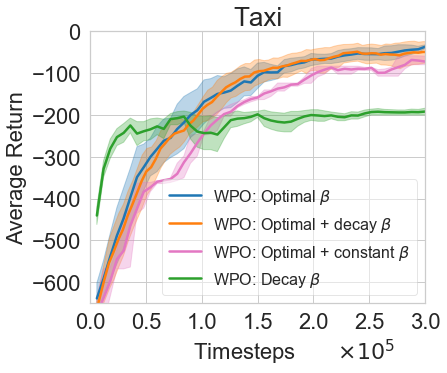

In [10]:
if isTaxi:
    xlim = 3
    ylim = -650
    df_plot(wass2_data, '_Episode', ['_AvgRewardSum'], isTaxi, isChain, isCliff, [ylim,0], [0,xlim], 'Wass2')
    df_plot(wass_data, '_Episode', ['_AvgRewardSum'], isTaxi, isChain, isCliff, [ylim,0], [0,xlim], 'Wass1')
    df_plot(wass3_data, '_Episode', ['_AvgRewardSum'], isTaxi, isChain, isCliff, [ylim,0], [0,xlim], 'Wass3')
    df_plot(wass4_data, '_Episode', ['_AvgRewardSum'], isTaxi, isChain, isCliff, [ylim,0], [0,xlim], 'Wass4')
if isChain:
    ylim = 1800
    xlim = 0.5
    df_plot(wass2_data, '_Episode', ['_AvgRewardSum'], isTaxi, isChain, isCliff, [ylim,3750], [0,xlim], 'Wass2')
    df_plot(wass_data, '_Episode', ['_AvgRewardSum'], isTaxi, isChain, isCliff, [ylim,3750], [0,xlim],'Wass1')
    df_plot(wass3_data, '_Episode', ['_AvgRewardSum'], isTaxi, isChain, isCliff, [ylim,3750], [0,xlim], 'Wass3')
    df_plot(wass4_data, '_Episode', ['_AvgRewardSum'], isTaxi, isChain, isCliff, [ylim,3750], [0,xlim],'Wass4')
if isCliff:
    xlim = 0.3
    df_plot(wass_data, '_Episode', ['_AvgRewardSum'], isTaxi, isChain, isCliff, [-3000,100], [0,0.3])

plt.rcParams["legend.framealpha"] = 0.9

if isTaxi:
    plt.rcParams["legend.framealpha"] = 0.5
    
plt.legend(fontsize= 16, loc='lower right')